In [87]:
import csv
import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 

from sklearn.feature_extraction.text import CountVectorizer

In [88]:
# Abrir el archivo CSV en modo lectura
with open('./transactions_data.csv', 'r') as archivo_csv:
    # Crear un objeto para leer el archivo CSV, indicando el separador de campos
    lector_csv = csv.reader(archivo_csv, delimiter=';')
    
    # Leer la primera fila del archivo CSV, que contiene los nombres de las columnas
    nombres_columnas = next(lector_csv)
    
    # Encontrar el índice de la columna 'Itemname'
    indice_columna = nombres_columnas.index('Itemname')
    
    # Crear una lista para almacenar los valores de la columna 'Itemname'
    valores_columna = []
    
    # Iterar sobre cada fila del archivo CSV y agregar el valor de la columna 'Itemname' a la lista
    for fila in lector_csv:
        valores_columna.append(fila[indice_columna])
        
    # Haz algo con los valores de la columna 'Itemname', como imprimir los primeros elementos
    print(valores_columna[:10])



['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER', 'HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT', 'ASSORTED COLOUR BIRD ORNAMENT']


In [89]:
T = pd.DataFrame(valores_columna, columns=['itemname'])
T.head()

,itemname
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.


In [90]:
# valores_columna = pd.DataFrame(valores_columna)
# print(valores_columna.head())
corpus = list(T['itemname'])

In [91]:
# stop_words = CountVectorizer(stop_words='english').get_stop_words()
# vectorizer = CountVectorizer(stop_words=stop_words) #cuenta la frecuencia de ocurrencia de cada término en cada documento
# X = vectorizer.fit_transform(corpus)

In [92]:
vectorizer = CountVectorizer() #cuenta la frecuencia de ocurrencia de cada término en cada documento
X = vectorizer.fit_transform(corpus) 

In [93]:
print(vectorizer.get_feature_names_out())
print(len(vectorizer.get_feature_names_out()))

['00' '10' '100' ... 'yuletide' 'zero' 'zinc']
2270


In [94]:
df = pd.DataFrame(X.toarray())
df.columns = vectorizer.get_feature_names_out()
df_bool = df.astype('bool')
df_bool

MemoryError: Unable to allocate 8.83 GiB for an array with shape (522064, 2270) and data type int64

<AxesSubplot:>

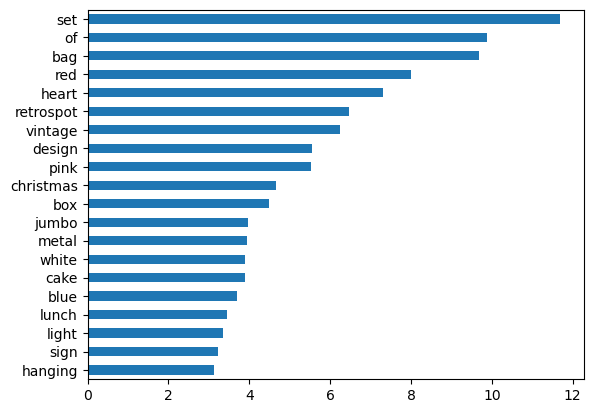

In [ ]:
item_freq = df_bool.sum(axis=0)/len(df)*100
item_freq.sort_values()[-20:].plot.barh() 


In [ ]:
frequent_itemsets = apriori(df_bool, min_support=0.005, use_colnames=True)
frequent_itemsets

MemoryError: Unable to allocate 16.2 GiB for an array with shape (16653, 2, 522064) and data type bool